In [221]:
import numpy as np
from google.colab import drive
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
data=pd.read_csv("/content/drive/MyDrive/Kmeans_PCA/data.csv")

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [34]:
data=data.drop('id',axis=1)
data=data.drop('Unnamed: 32',axis=1)
data.shape

(569, 31)

In [35]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
scaler=StandardScaler()
data.iloc[:,1:len((data).transpose()) ]=scaler.fit_transform(data.iloc[:,1:len((data).transpose()) ])


In [110]:
X=data.drop('diagnosis',axis=1)
y=pd.factorize(data['diagnosis'])[0]
data['diagnosis']=pd.factorize(data['diagnosis'])[0]

In [222]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

In [242]:
class Kmeans:
  def __init__(self,data,k,max_iters):
    self.k=k
    self.max_iters=max_iters
    self.data=data
    self.clusters = {i: [] for i in range(self.k)}  #create k empty clusters
    self.centroids=None
    self.cluster_targets = [None] * self.k
    self.flag=False
  def fit(self,X,y):
    random_indexes=np.random.choice(len(X),self.k,replace=False) #get k random indexes
    self.centroids=X.iloc[random_indexes,:] #get k random samples
    self.targets=y[random_indexes]



    for i in range(self.max_iters): #update max_iters times
      self.clusters = {i: [] for i in range(self.k)}
      for idx,x in enumerate(X.values): #loop over all samples
        #print(x,idx)
        distances = np.linalg.norm(x - self.centroids, axis=1)  #calculate distances between each sample and centroids
        closest_centroid = np.argmin(distances)  #take the index of smallest distance
        self.clusters[closest_centroid].append(x)  #append it to the right cluster
      new_centroids=np.zeros_like(self.centroids)
      for i,cluster in enumerate(self.clusters.values()):
        if (len(cluster)>0):
          new_centroids[i]=np.mean(cluster,axis=0) #update centroids
        else:
          new_centroids[i]=self.centroids[i]
      for cluster_idx, cluster_values in self.clusters.items():
        targets_values = []

        for x in cluster_values:  # Loop through the data points in the cluster
            # Get the target value corresponding to the data point 'x'


            matching_rows = self.data.loc[(self.data[X.columns].values == x).all(axis=1)]
            if not matching_rows.empty:
                target_value = matching_rows['diagnosis'].iloc[0]
                targets_values.append(target_value)

        if targets_values:
            self.cluster_targets[cluster_idx] = np.bincount(targets_values).argmax()

      if np.allclose(self.centroids, new_centroids, atol=1e-6):
          break
      self.centroids=new_centroids
  def calculate_sse(self,X):
    sse=0
    for i,cluster in enumerate(self.clusters.values()):
      cluster_points=np.array(cluster)
      if len(cluster):
        distances=np.linalg.norm(cluster_points-self.centroids[i],axis=1)
        sse+=np.sum(distances**2)
        #print(f"Cluster {i+1} SSE: {sse}")
    return sse
  def predict(self,X):
    predicted_centroid=[]
    for x in X.values:
      distances=np.linalg.norm(x-self.centroids,axis=1)
      predicted_centroid.append(np.argmin(distances))

    return [self.cluster_targets[i] for i in predicted_centroid]


In [234]:
def elbow_method(data,X,y):
  sse=[]
  range_k=[]
  for i in range(1,21):
    kmeans=Kmeans(data,k=i,max_iters=5)
    kmeans.fit(X,y)
    range_k.append(i)
    sse.append(kmeans.calculate_sse(X))
  return range_k,sse


In [243]:
range_k,sse=elbow_method(data,X_train,y_train)

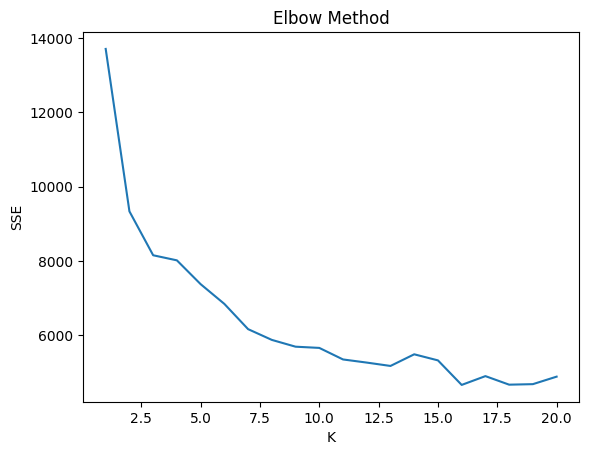

In [236]:
plt.plot(range_k,sse)
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

BEST K

In [237]:
kmeans=Kmeans(data,k=5,max_iters=5)
kmeans.fit(X_train,y_train)
y_pred=kmeans.predict(X_test)

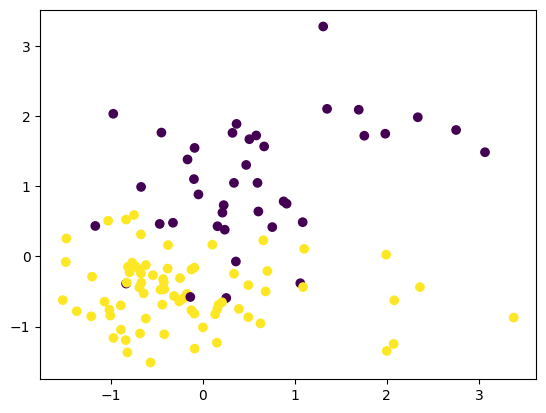

In [240]:
plt.scatter(X_test.iloc[:,1],X_test.iloc[:,2],c=y_test)

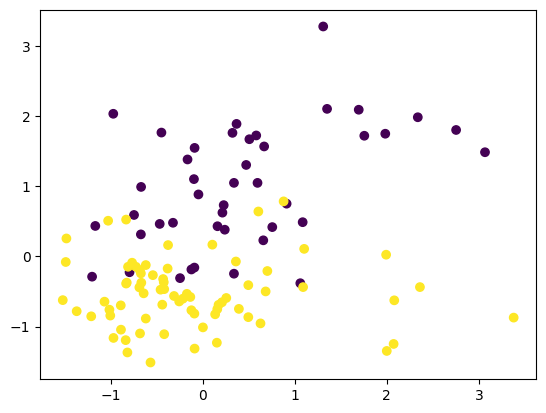

In [239]:
plt.scatter(X_test.iloc[:,1],X_test.iloc[:,2],c=y_pred)

Accuracy

In [241]:
y_pred=kmeans.predict(X_test)
np.sum(y_pred==y_test)/len(y_test)

0.868421052631579